In [5]:
import pandas as pd 
#load the data file "online_classroom_data"
online = pd.read_csv("online_classroom_data.csv",sep = ',') 
# Preview the first 5 lines of the loaded data 
online.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [7]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
Unnamed: 0            71 non-null int64
total_posts           71 non-null float64
helpful_post          71 non-null float64
nice_code_post        71 non-null float64
collaborative_post    71 non-null float64
confused_post         71 non-null float64
creative_post         71 non-null float64
bad_post              71 non-null float64
amazing_post          71 non-null float64
timeonline            71 non-null float64
sk1_classroom         71 non-null object
sk2_classroom         71 non-null object
sk5_classroom         71 non-null object
sk3_classroom         71 non-null object
sk4_classroom         71 non-null object
Approved              71 non-null int64
dtypes: float64(9), int64(2), object(5)
memory usage: 9.0+ KB


In [8]:
online["sk1_classroom"] = online["sk1_classroom"].str.replace(",",".").astype(float)

In [9]:
online["sk2_classroom"] = online["sk2_classroom"].str.replace(",",".").astype(float)
online["sk3_classroom"] = online["sk3_classroom"].str.replace(",",".").astype(float)
online["sk4_classroom"] = online["sk4_classroom"].str.replace(",",".").astype(float)
online["sk5_classroom"] = online["sk5_classroom"].str.replace(",",".").astype(float)

In [10]:
online.describe()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.000000,5.507042,4.028169,7.478873,11.366197,0.549296,18.309859,0.056338,18.957746,10279.126761,5.246479,5.078873,4.788732,5.445070,6.878873,0.704225
std,20.639767,6.480461,6.843082,12.746831,13.970622,1.350013,21.930795,0.287219,22.086477,10176.243372,3.324190,3.273396,3.448252,3.564459,3.856198,0.459639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,2.000000,0.000000,0.000000,1.500000,0.000000,6.500000,0.000000,7.000000,1627.500000,2.150000,2.050000,0.500000,1.150000,4.500000,0.000000
50%,35.000000,4.000000,3.000000,2.000000,7.000000,0.000000,14.000000,0.000000,16.000000,7664.000000,6.000000,5.700000,5.000000,6.700000,8.700000,1.000000
75%,52.500000,7.500000,5.500000,12.500000,16.000000,0.000000,24.000000,0.000000,25.500000,16574.000000,8.000000,8.000000,8.000000,8.000000,9.600000,1.000000
max,70.000000,46.000000,53.000000,90.000000,89.000000,7.000000,150.000000,2.000000,155.000000,43612.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Saving figure attribute_histogram_plots_online


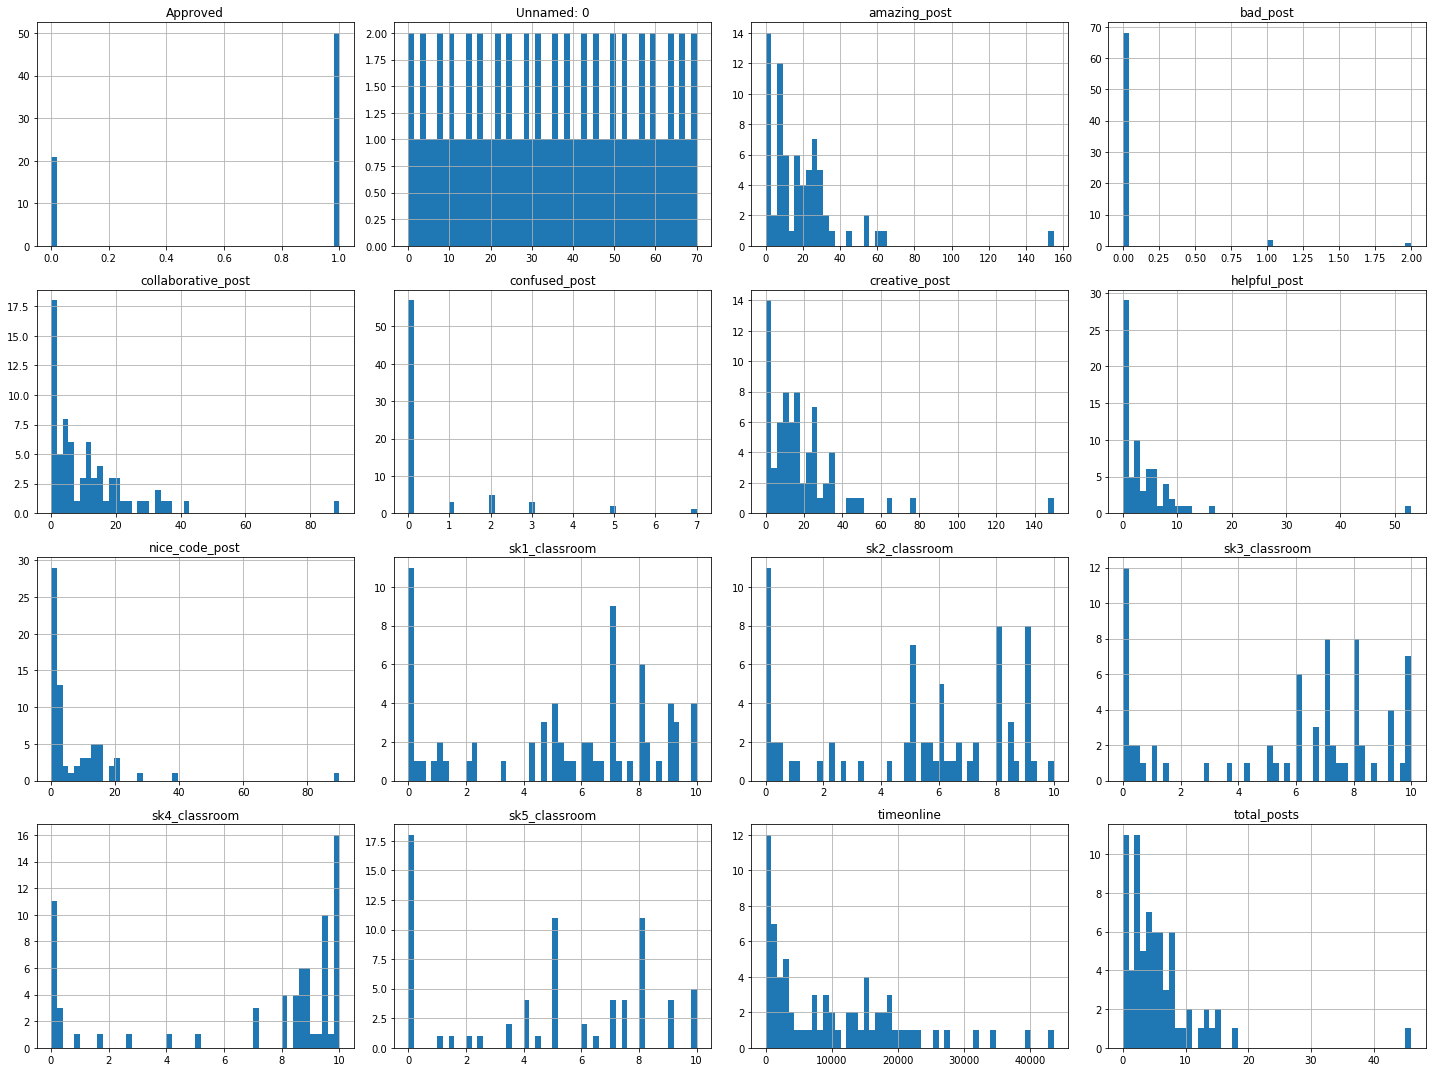

In [11]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
online.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_online")
plt.show()

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
helpful_post_ix, nice_code_post_ix, collaborative_post_ix, creative_post_ix, amazing_post_ix, sk1_classroom, sk2_classroom, sk3_classroom, sk4_classroom, sk5_classroom= 2, 3, 4, 6, 8, 10, 11, 14, 12, 13

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_posts = True): # no *args or **kargs
        self.add_posts = add_posts
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        sk_total = X[:, sk1_classroom] + X[:, sk2_classroom]+ X[:, sk3_classroom]+ X[:, sk4_classroom]+ X[:, sk5_classroom]
        nice_posts = X[:, helpful_post_ix] + X[:, nice_code_post_ix] +X[:, collaborative_post_ix]+X[:, creative_post_ix]+X[:, amazing_post_ix]
  
        if self.add_posts:
            nice_posts = X[:, helpful_post_ix] + X[:, nice_code_post_ix] +X[:, collaborative_post_ix]+X[:, creative_post_ix]+X[:, amazing_post_ix]
            return np.c_[X, nice_posts,
                         sk_total]
        else:
            return np.c_[X, nice_posts,
                         sk_total]

attr_adder = CombinedAttributesAdder(add_posts=False)
online_extra_attribs = attr_adder.transform(online.values)

In [13]:
online_extra_attribs = pd.DataFrame(
    online_extra_attribs,
    columns=list(online.columns)+["nice_posts", "sk_total"],
    index=online.index)
online_extra_attribs.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved,nice_posts,sk_total
0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,2.1,2.4,3.5,3.6,1.7,0.0,7.0,13.3
1,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,0.3,0.3,0.0,0.1,0.2,0.0,6.0,0.9
2,2.0,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8.0,5.0,5.0,7.0,5.0,1.0,40.0,30.0
3,3.0,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6.0,5.0,4.0,6.0,4.0,1.0,32.0,25.0
4,4.0,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,8.7,9.0,6.5,10.0,8.8,1.0,144.0,43.0


In [14]:
online_basic = online_extra_attribs.drop(["total_posts", "helpful_post","nice_code_post","collaborative_post","confused_post","creative_post","bad_post","amazing_post","sk1_classroom","sk2_classroom","sk3_classroom","sk4_classroom","sk5_classroom"],axis=1)
online_basic.head()

,Unnamed: 0,timeonline,Approved,nice_posts,sk_total
0,0.0,1600.0,0.0,7.0,13.3
1,1.0,592.0,0.0,6.0,0.9
2,2.0,1110.0,1.0,40.0,30.0
3,3.0,8651.0,1.0,32.0,25.0
4,4.0,34172.0,1.0,144.0,43.0


Saving figure attribute_histogram_plots_online_basic


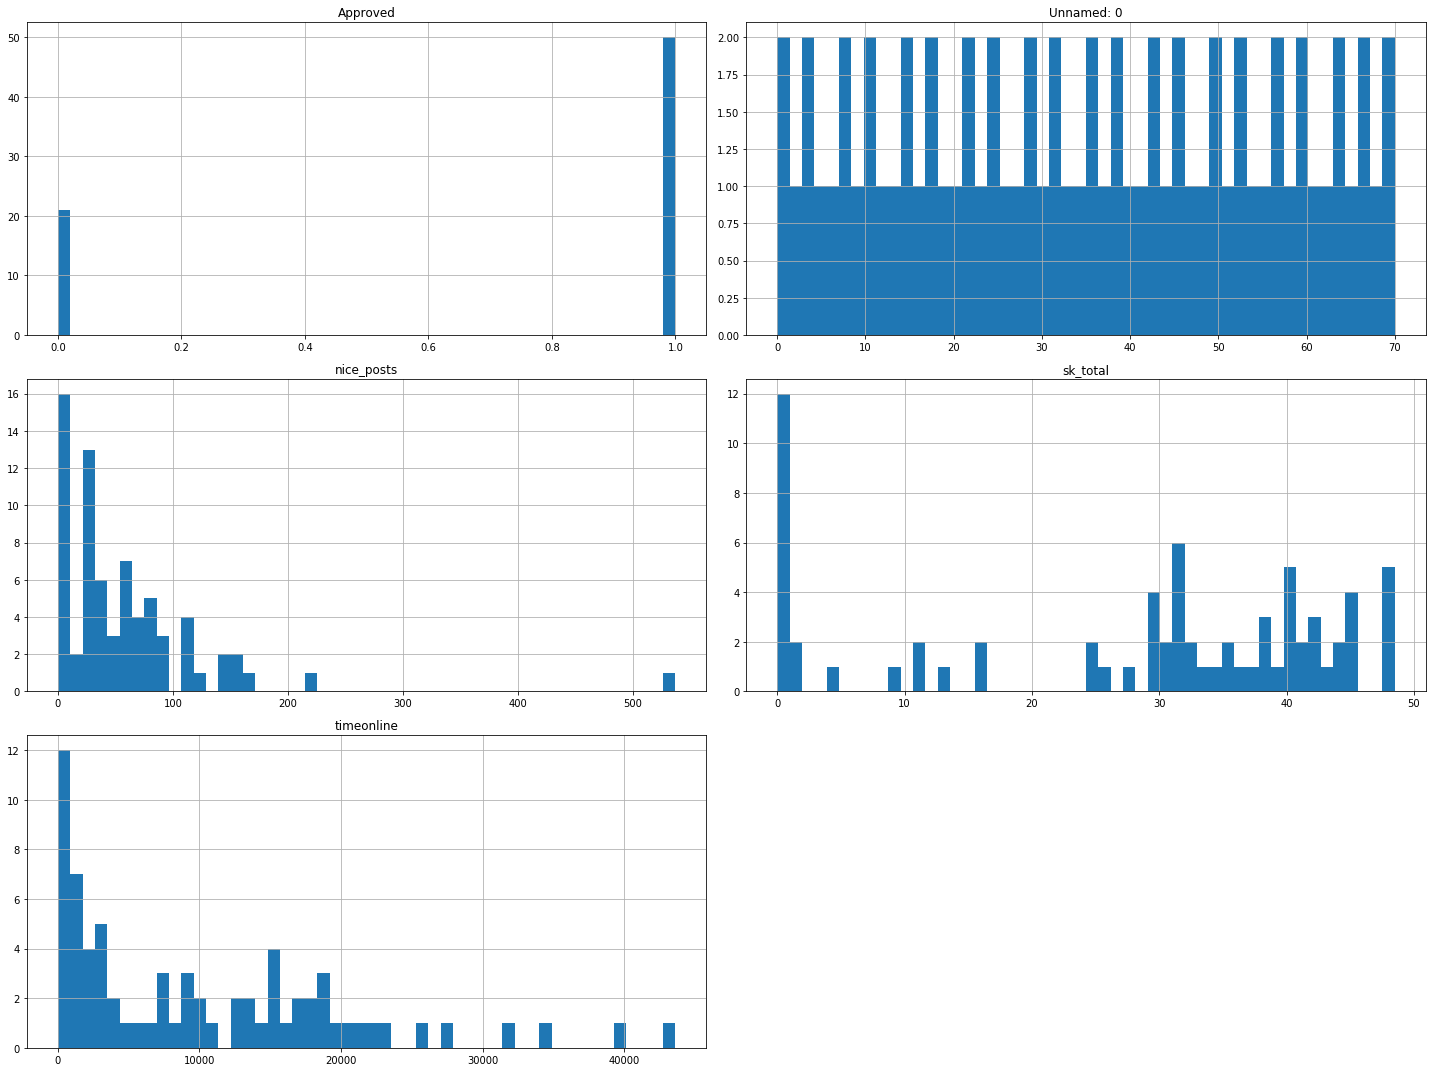

In [15]:
online_basic.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_online_basic")
plt.show()

In [16]:
online_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
Unnamed: 0    71 non-null float64
timeonline    71 non-null float64
Approved      71 non-null float64
nice_posts    71 non-null float64
sk_total      71 non-null float64
dtypes: float64(5)
memory usage: 2.9 KB


In [17]:
online_basic.describe()

,Unnamed: 0,timeonline,Approved,nice_posts,sk_total
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.000000,10279.126761,0.704225,60.140845,27.438028
std,20.639767,10176.243372,0.459639,74.916391,16.577914
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,1627.500000,0.000000,20.500000,12.400000
50%,35.000000,7664.000000,1.000000,40.000000,31.700000
75%,52.500000,16574.000000,1.000000,80.500000,40.000000
max,70.000000,43612.000000,1.000000,537.000000,48.500000


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


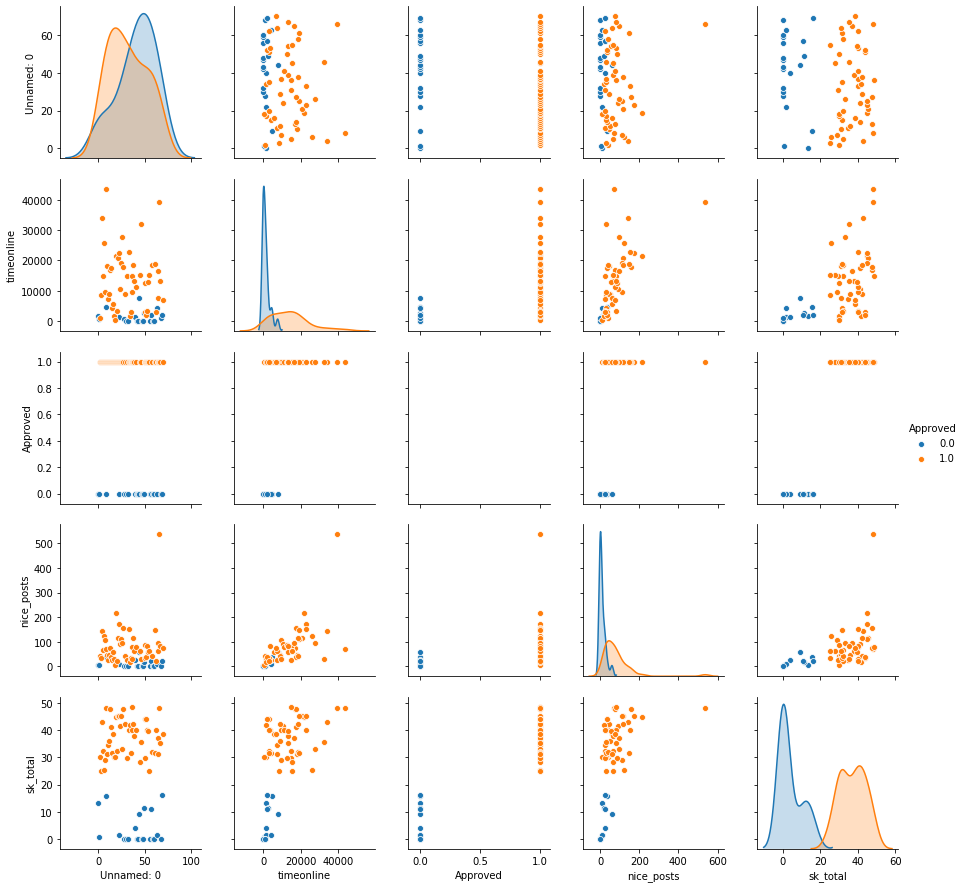

In [18]:
import seaborn as sns
sns.pairplot(online_basic, hue = 'Approved')

In [19]:
online_basic.corr()

,Unnamed: 0,timeonline,Approved,nice_posts,sk_total
Unnamed: 0,1.000000,-0.154748,-0.198772,0.035561,-0.175187
timeonline,-0.154748,1.000000,0.568298,0.689307,0.618938
Approved,-0.198772,0.568298,1.000000,0.434348,0.920713
nice_posts,0.035561,0.689307,0.434348,1.000000,0.529754
sk_total,-0.175187,0.618938,0.920713,0.529754,1.000000


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


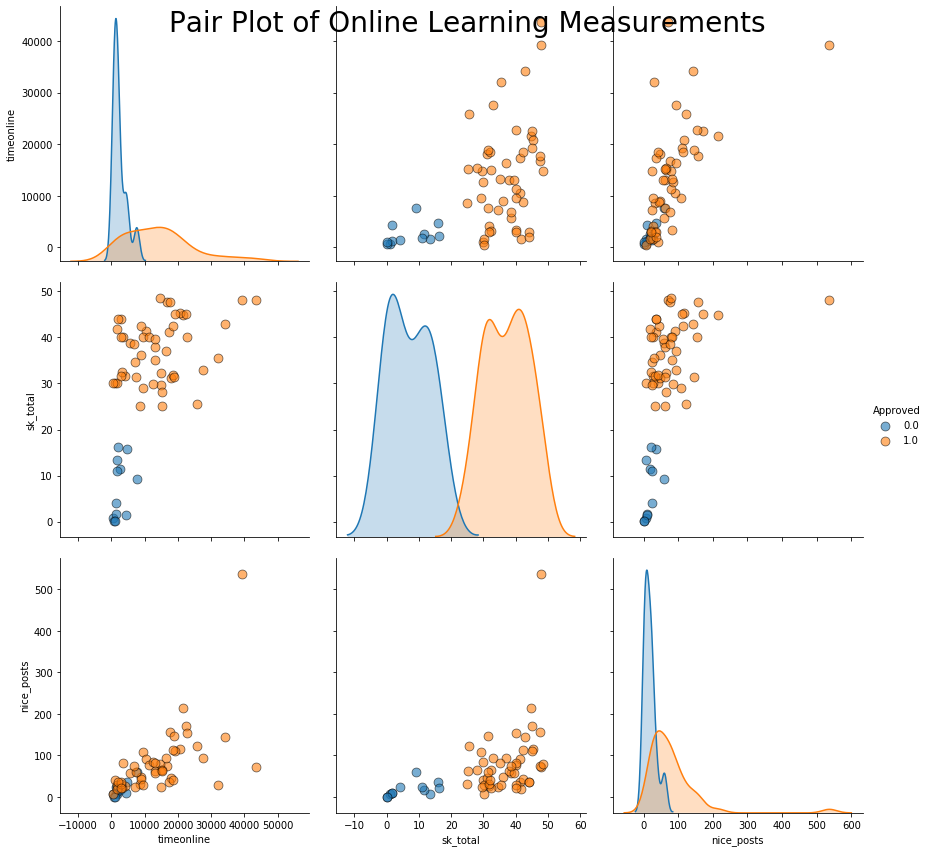

In [20]:
# Plot colored by continent for years 2000-2007
sns.pairplot(online_basic[online_basic['timeonline'] >= 1], 
             vars = ['timeonline', 'sk_total', 'nice_posts'], 
             hue = 'Approved', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot of Online Learning Measurements', 
             size = 28);

In [21]:
import numpy as np
data_X=online_basic["sk_total"].copy()
data_labels=online_basic["nice_posts"].copy()
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=101)

Saving figure online_learning_visualization_plot


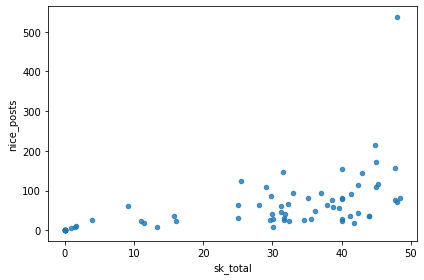

In [22]:
online_basic.plot(kind="scatter", x="sk_total", y="nice_posts",alpha=0.8)
save_fig("online_learning_visualization_plot")

In [23]:
corr_matrix = online_basic.corr()

In [24]:
corr_matrix

,Unnamed: 0,timeonline,Approved,nice_posts,sk_total
Unnamed: 0,1.000000,-0.154748,-0.198772,0.035561,-0.175187
timeonline,-0.154748,1.000000,0.568298,0.689307,0.618938
Approved,-0.198772,0.568298,1.000000,0.434348,0.920713
nice_posts,0.035561,0.689307,0.434348,1.000000,0.529754
sk_total,-0.175187,0.618938,0.920713,0.529754,1.000000


In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
data_X_train=pd.DataFrame(data_X_train)
#data_X_train=data_X_train.reshape(-1, 1)
lin_reg.fit(data_X_train,data_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
data_X_test=pd.DataFrame(data_X_test)
data_pred=lin_reg.predict(data_X_test)
print("Predictions:", lin_reg.predict(data_X_test))

Predictions: [ 57.51378674  68.5784153   89.42108772  -8.10203382  73.98207111
 114.63814817  98.42718073  94.82474353  91.47962326 114.63814817
  -8.10203382  -3.98496273  97.91254685  69.09304919  56.22720202]


In [27]:
from sklearn.metrics import mean_squared_error

data_pred = lin_reg.predict(data_X_test)
lin_mse = mean_squared_error(data_labels_test, data_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

37.230148745408314

In [28]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels_test, data_pred)
lin_mae


31.63095551626698

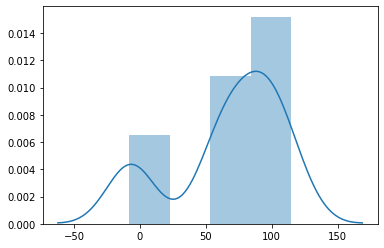

In [29]:
import seaborn as sns
sns.distplot((data_pred))

In [30]:
data_labels_pred=pd.DataFrame(data_pred)
data_labels_pred.head()

,0
0,57.513787
1,68.578415
2,89.421088
3,-8.102034
4,73.982071


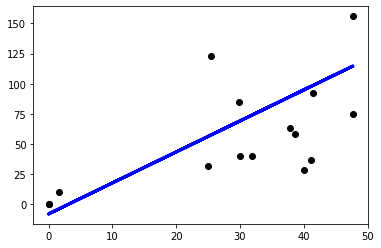

In [31]:
plt.scatter(data_X_test, data_labels_test,  color='black')
plt.plot(data_X_test, data_labels_pred, color='blue', linewidth=3)

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_X_train, data_labels_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [33]:
data_predictions_tree = tree_reg.predict(data_X_train)
tree_mse = mean_squared_error(data_labels_train, data_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

46.64402618311833

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_X_train, data_labels_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [193.09507589  49.36766823  36.82065204 104.88326845  42.01790844
  34.76408587 211.17161268  46.62617291  25.94781087  40.05308977]
Mean: 78.47473451436899
Standard deviation: 65.20378135571961


In [36]:
lin_scores = cross_val_score(lin_reg, data_X_train, data_labels_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [182.22970899  31.54859271  39.08497961  41.68256061  53.01019508
  52.56563093  52.88608208  44.23540518   9.59206762  33.66169794]
Mean: 54.04969207560727
Standard deviation: 44.50439602159346


In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_X_train, data_labels_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [38]:
data_predictions_rf = forest_reg.predict(data_X_train)
forest_mse = mean_squared_error(data_labels_train, data_predictions_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

50.53776974208051

In [39]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_X_train, data_labels_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [187.73656722  50.60706304  34.19574362  96.46099423  42.3080104
  40.92509097 130.06863432  41.91907782  23.57651544  37.96934327]
Mean: 68.57670403424703
Standard deviation: 50.38842632396306


In [40]:
scores = cross_val_score(lin_reg, data_X_train, data_labels_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean      54.049692
std       46.911752
min        9.592068
25%       35.017518
50%       42.958983
75%       52.805969
max      182.229709
dtype: float64

In [41]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_X_train, data_labels_train)
data_predictions_svm = svm_reg.predict(data_X_train)
svm_mse = mean_squared_error(data_labels_train, data_predictions_svm)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

69.85726767172673

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=2),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

In [43]:
rnd_search.fit(data_X_train, data_labels_train)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [44]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

90.41176163774878 {'max_features': 1, 'n_estimators': 103}
90.92270910124272 {'max_features': 1, 'n_estimators': 180}
89.55725058351045 {'max_features': 1, 'n_estimators': 93}
88.9917261347172 {'max_features': 1, 'n_estimators': 15}
90.26064653551751 {'max_features': 1, 'n_estimators': 107}
88.56977240305388 {'max_features': 1, 'n_estimators': 72}
91.05327336772653 {'max_features': 1, 'n_estimators': 189}
90.37121860702706 {'max_features': 1, 'n_estimators': 21}
90.41176163774878 {'max_features': 1, 'n_estimators': 103}
89.76086782191386 {'max_features': 1, 'n_estimators': 122}


In [45]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([1.])

In [46]:
final_model = rnd_search.best_estimator_


final_predictions = final_model.predict(data_X_test)

final_mse = mean_squared_error(data_labels_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [47]:
final_rmse

52.460441435985835

In [49]:
final_predictions_train = final_model.predict(data_X_train)
final_mse_train = mean_squared_error(data_labels_train, final_predictions_train)
final_rmse_train = np.sqrt(final_mse_train)

In [50]:
final_rmse_train

51.07739384673786